In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [38]:
data_v = pd.read_csv("/Users/samruddhikale/Desktop/Fey/EV Data/Car details v3.csv")
data_v.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [39]:
data_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [40]:
data_v = data_v[(data_v['year'] >= 2015) & (data_v['year'] <= 2023)]
data_v= data_v.drop(data_v[data_v['fuel'] == 'LPG'].index)
data_v.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
15,Mahindra KUV 100 mFALCON G80 K8 5str,2016,400000,40000,Petrol,Individual,Manual,First Owner,18.15 kmpl,1198 CC,82 bhp,115Nm@ 3500-3600rpm,5.0
16,Maruti Ertiga SHVS VDI,2016,778000,70000,Diesel,Individual,Manual,Second Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0
19,Hyundai i20 2015-2017 Asta 1.4 CRDi,2016,680000,100000,Diesel,Individual,Manual,First Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
21,Honda WR-V i-DTEC VX,2017,950000,50000,Diesel,Individual,Manual,First Owner,25.5 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


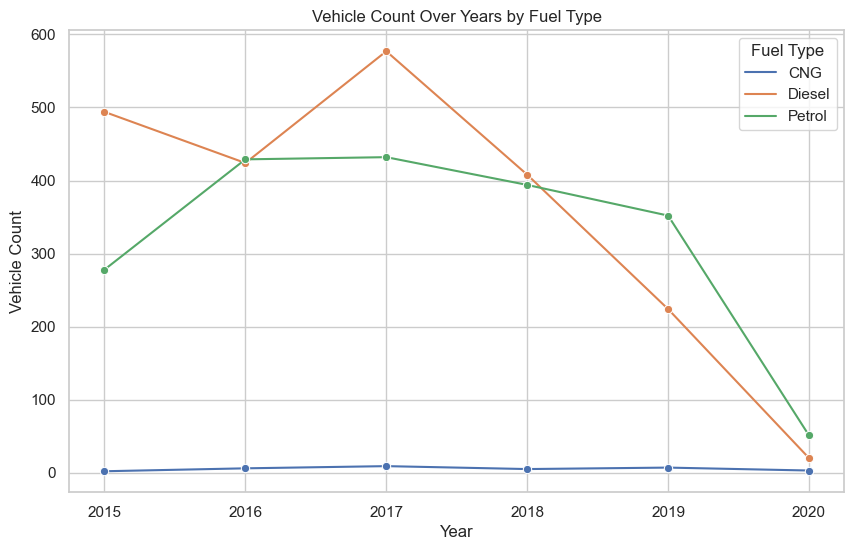

In [41]:
count_data = data_v.groupby(['year', 'fuel']).size().reset_index(name='count')

# Create a multiline chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x='year', y='count', hue='fuel', data=count_data, marker='o')

plt.title('Vehicle Count Over Years by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Vehicle Count')
plt.legend(title='Fuel Type')

plt.show()

In [56]:
CO_Emission_Data=pd.read_csv("/Users/samruddhikale/Desktop/Fey/EV Data/city_day.csv")
CO_Emission_Data.head()
CO_Emission_Data = CO_Emission_Data[CO_Emission_Data['City'] != 'Ahmedabad']

In [57]:
CO_Emission_Data['Date'] = pd.to_datetime(CO_Emission_Data['Date'])

# Group by 'city' and calculate the average CO emission
average_CO_by_city = CO_Emission_Data.groupby('City')['CO'].mean().reset_index()

# Display the result
print(average_CO_by_city)

                  City        CO
0               Aizawl  0.283628
1            Amaravati  0.627904
2             Amritsar  0.551301
3            Bengaluru  1.838634
4               Bhopal  0.880393
5         Brajrajnagar  1.798274
6           Chandigarh  0.631349
7              Chennai  1.067349
8           Coimbatore  0.949321
9                Delhi  1.976053
10           Ernakulam  1.627848
11            Gurugram  1.257516
12            Guwahati  0.735269
13           Hyderabad  0.590780
14              Jaipur  0.800894
15          Jorapokhar  0.663049
16               Kochi  1.296667
17             Kolkata  0.799251
18             Lucknow  2.130328
19              Mumbai  0.568362
20               Patna  1.533591
21            Shillong  0.239675
22             Talcher  1.847722
23  Thiruvananthapuram  0.951378
24       Visakhapatnam  0.736739


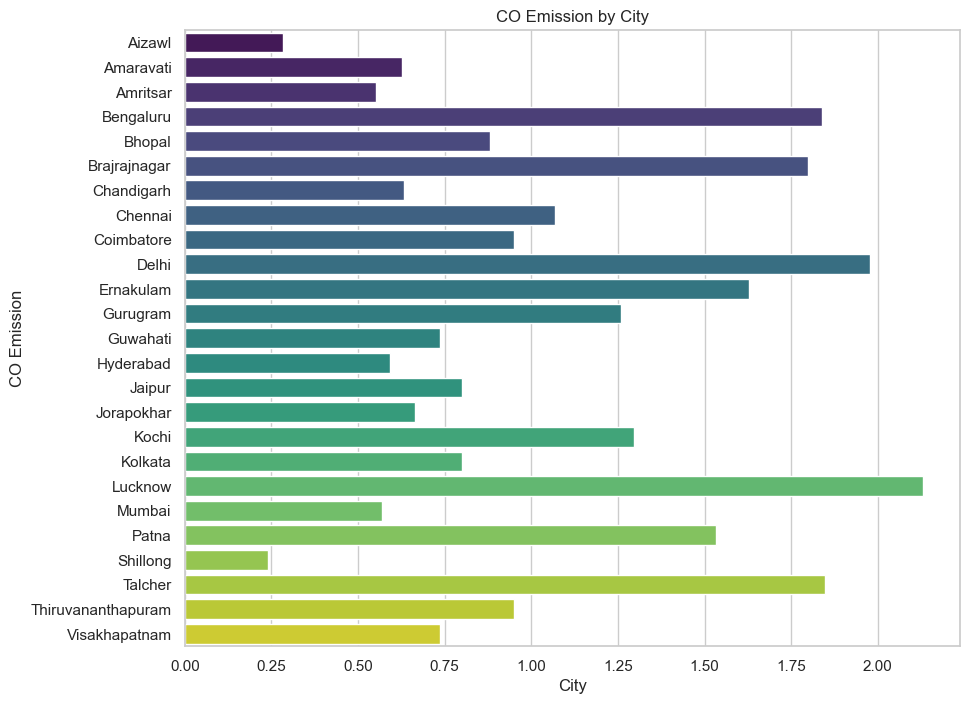

In [59]:

plt.figure(figsize=(10, 8))
sns.barplot(x='CO', y='City', data=average_CO_by_city, palette='viridis')


# Add labels and title
plt.xlabel('City')
plt.ylabel('CO Emission')
plt.title('CO Emission by City')

# Show the plot
plt.show()

In [62]:
data_ev = pd.read_excel("/Users/samruddhikale/Desktop/Fey/EV Data/smev_data.xlsx", sheet_name=None)
data_ev['EV Industries']

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-3 Wheelers,2017-18,91970
7,E-3 Wheelers,2018-19,116031
8,E-3 Wheelers,2019-20,143051
9,E-3 Wheelers,2020-21,90898


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


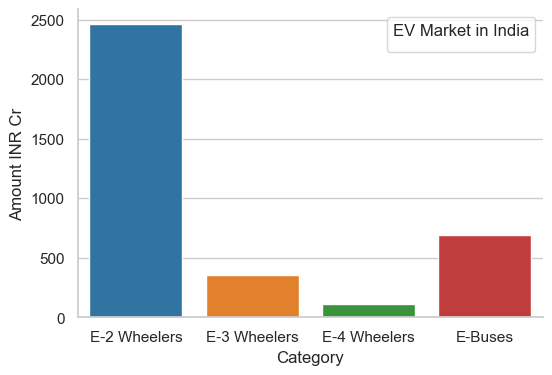

In [163]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(data=data_ev['EV Market'], x='Category', y='Amount INR Cr', palette='tab10')

plt.xlabel("Category")
plt.ylabel("Amount INR Cr")
plt.legend(title='EV Market in India')



ax.spines[['right', 'top']].set_visible(False)
plt.show()

In [73]:
data_ev.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

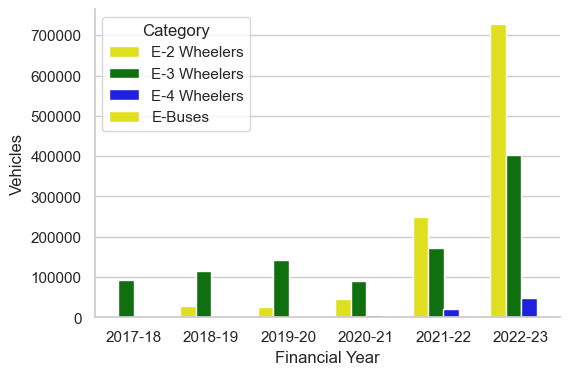

In [172]:
fig, ax = plt.subplots(figsize=(6, 4))
custom_palette = ['yellow', 'green', 'blue']
palette=custom_palette
ax = sns.barplot(data=data_ev['EV Industries'], x='financial_year', y='num_vehicles', hue='category', palette=palette)

plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Category')



ax.spines[['right', 'top']].set_visible(False)
plt.show()

/var/folders/bm/pv51_gj91jvdykfwty90ptrw0000gn/T/ipykernel_15971/1474116970.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_data, x='month', y='num_vehicles', marker='o',color='red',ci=None)


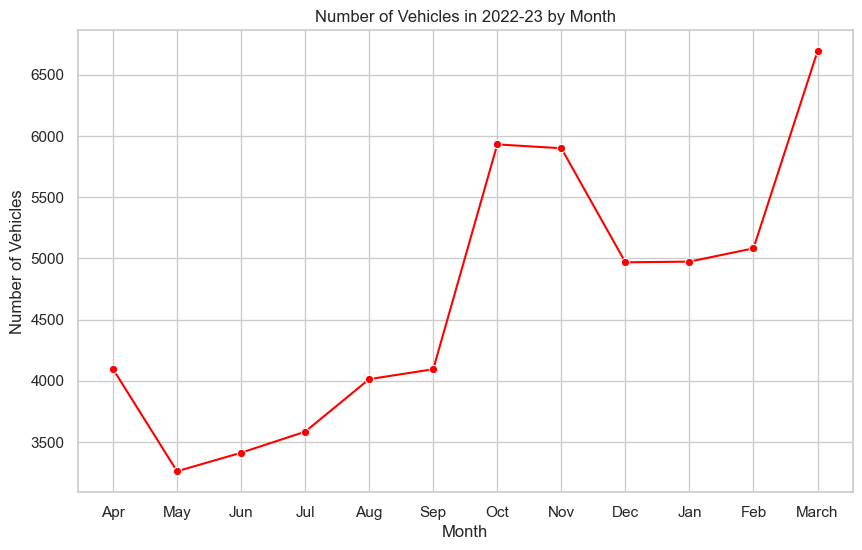

In [188]:
filtered_data = data_ev['EV 2W FY 22-23'][data_ev['EV 2W FY 22-23']['financial_year'] == '2022-23']

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='month', y='num_vehicles', marker='o',color='red',ci=None)

plt.xlabel("Month")
plt.ylabel("Number of Vehicles")
plt.title("Number of Vehicles in 2022-23 by Month")

plt.show()

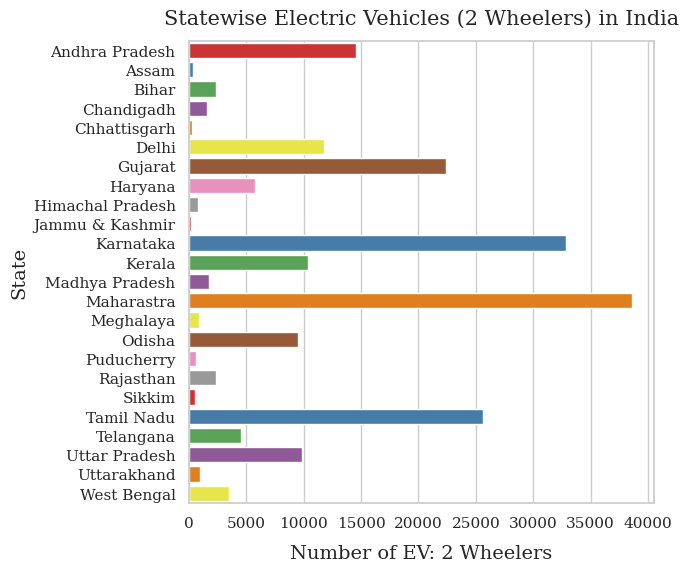

In [190]:
df1 = pd.read_csv('/Users/samruddhikale/Desktop/Fey/EV Data/1_ev_charger_dataset.csv')



plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='2W', palette='Set1')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()
     

In [109]:
ev2w = list(data_ev.keys())[0:4]
data_ev2w = pd.concat([data_ev[ev2w[0]], data_ev[ev2w[1]], data_ev[ev2w[2]], data_ev[ev2w[3]]])


In [110]:
data_ev2w['maker'] = data_ev2w['maker'].str.upper()

In [111]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BEING INDIA', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'JITENDRA NEW EV', 'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH',
       'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [113]:
data_ev2w['maker'] = data_ev2w['maker'].replace('AMPERE VEHICLES', 'AMPERE').replace('ATHER ENERGY', 'ATHER').replace('BEING INDIA', 'BENLING').replace('JITENDRA NEW EV', 'JITENDRA').replace('OKINAWA AUTOTECH', 'OKINAWA')

In [114]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'ATHER', 'BAJAJ', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'OKAYA EV', 'OKINAWA', 'OLA ELECTRIC', 'OTHERS', 'PURE EV',
       'REVOLT', 'TVS'], dtype=object)

In [115]:
data_ev2w_year = data_ev2w.groupby(['financial_year', 'maker']).agg({'num_vehicles':'sum'}).reset_index()

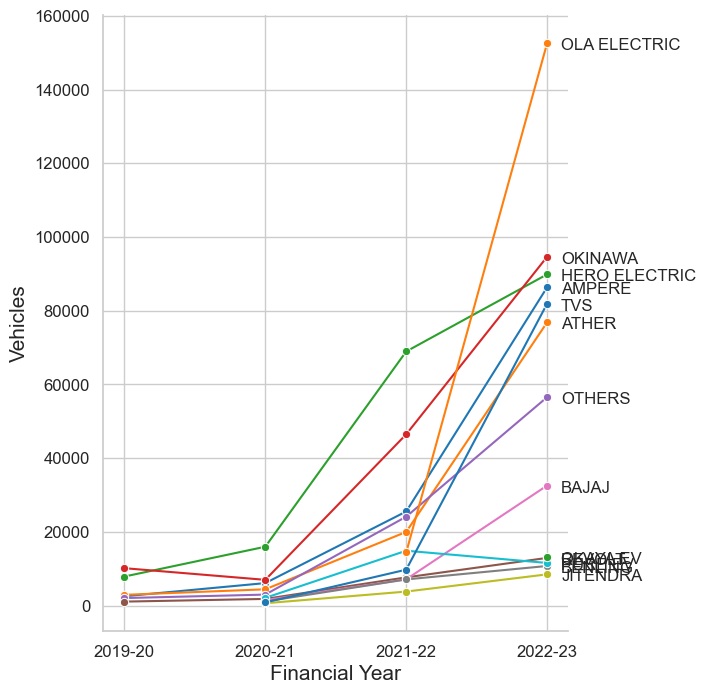

In [119]:
fig, ax = plt.subplots(figsize=(6,8))
ax = sns.lineplot(data=data_ev2w_year, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10')
plt.xlabel("Financial Year", fontsize = 15)
plt.ylabel("Vehicles", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title='Maker')

# Annotate the last data point
for col in data_ev2w_year['maker'].unique()[::1]:
    last_point = data_ev2w_year[data_ev2w_year['maker'] == col].iloc[-1]
    plt.annotate(f"{last_point['maker']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.show()

In [122]:
data_bw = pd.read_csv("/Users/samruddhikale/Desktop/Fey/EV Data/ev2_bikewale.csv")
data_model = pd.read_csv("/Users/samruddhikale/Desktop/Fey/EV Data/ev_model_spec.csv")

In [123]:
data = data_bw.merge(data_model, how = 'left', on = 'Model Name')

<Axes: >

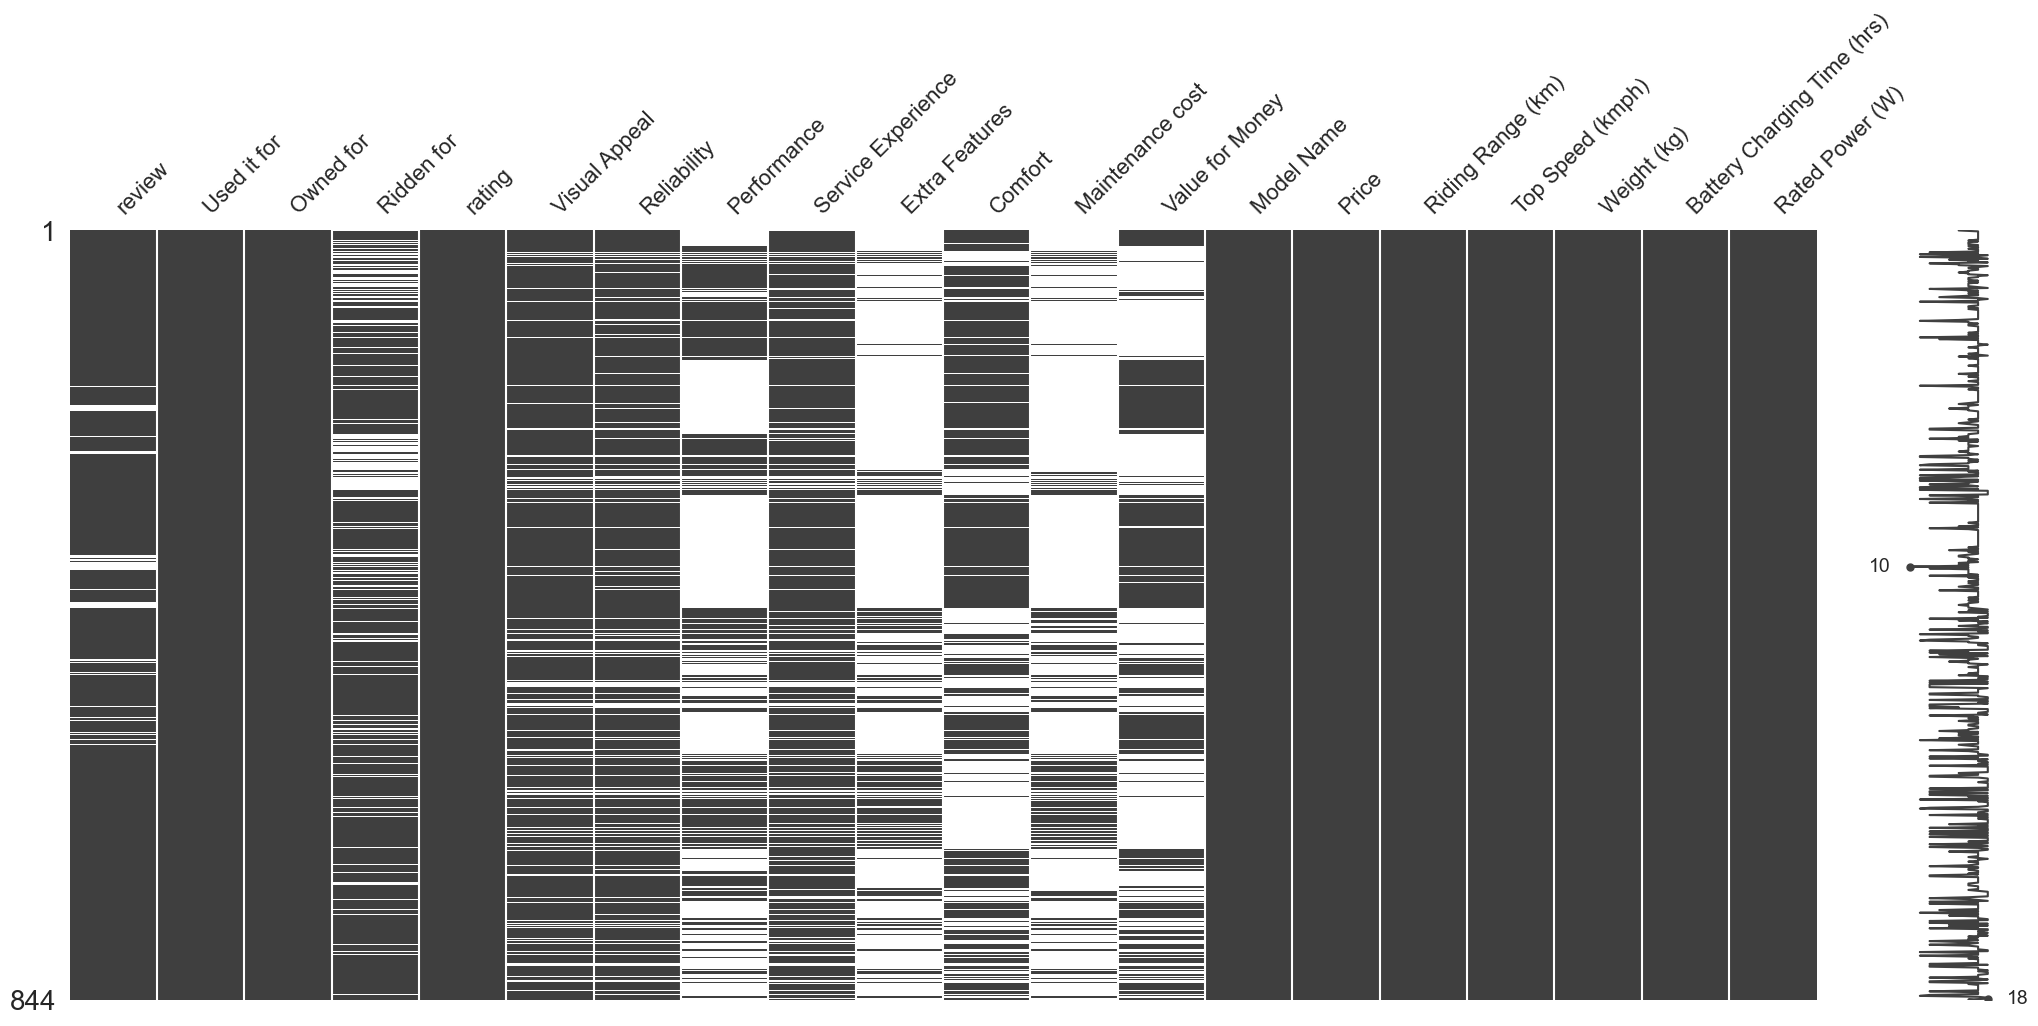

In [124]:
msno.matrix(data)

In [125]:
((data.isnull().sum() * 100/data.shape[0])).sort_values(ascending = False)

Maintenance cost               78.672986
Extra Features                 78.080569
Performance                    59.123223
Value for Money                53.791469
Comfort                        37.203791
Ridden for                     20.853081
Service Experience             16.706161
Reliability                    15.165877
Visual Appeal                  12.440758
review                          5.568720
Used it for                     0.000000
rating                          0.000000
Owned for                       0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64

In [127]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/samruddhikale/nltk_data...


True

In [128]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()


In [129]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

for review_text in data['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue
    sentiment_scores = sentiments.polarity_scores(review_text)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)
    
data['sentiment'] = sentiments_list

In [130]:
data['sentiment'].value_counts()

sentiment
positive    527
negative    264
neutral      53
Name: count, dtype: int64

In [131]:
data_segment = data[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'sentiment']].copy()

In [132]:
data_segment = data.iloc[:, 5:13].copy()

In [133]:
data_segment = data_segment.fillna(0.)

In [134]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)

In [135]:
pca = PCA(random_state = 42)
pca.fit(data_scaled)

PCA(random_state=42)

In [136]:
data_pca = pca.transform(data_scaled)

In [137]:
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])

In [138]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [139]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [140]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns, index = df_pca.columns).T

In [193]:
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065


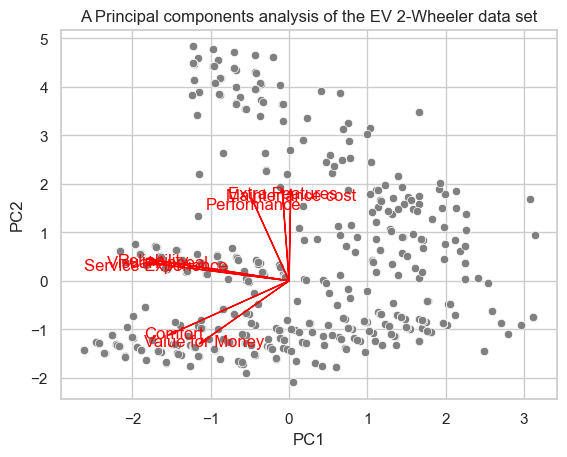

In [142]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.show()

In [143]:
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]

/Users/samruddhikale/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/samruddhikale/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/samruddhikale/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/samruddhikale/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

In [144]:
wcss = [model.inertia_ for model in data_km28]

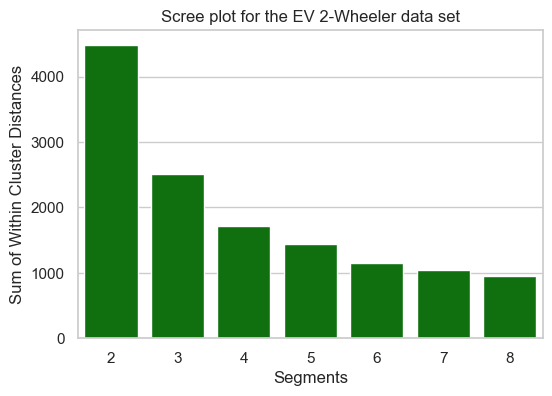

In [195]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = list(range(2, 9)), y = wcss, color = 'green')
plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")
plt.show()

In [147]:
wcss_diff = pd.DataFrame({'Segments':range(2,9),
                          'WCSS Difference': pd.Series(wcss).diff()})
wcss_diff['WCSS Difference'][0] = 0

/var/folders/bm/pv51_gj91jvdykfwty90ptrw0000gn/T/ipykernel_15971/3704507040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wcss_diff['WCSS Difference'][0] = 0


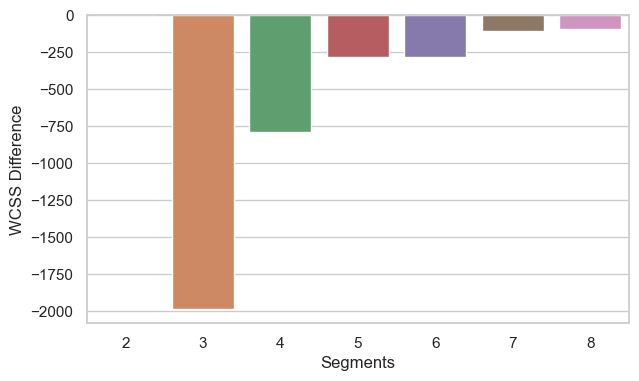

In [148]:
plt.figure(figsize = (7, 4))
sns.barplot(wcss_diff, x = 'Segments', y = 'WCSS Difference')
plt.show()

In [149]:
kmeans = data_km28[2]

In [150]:
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_

In [151]:
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

In [152]:
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_

In [153]:
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T

In [154]:
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

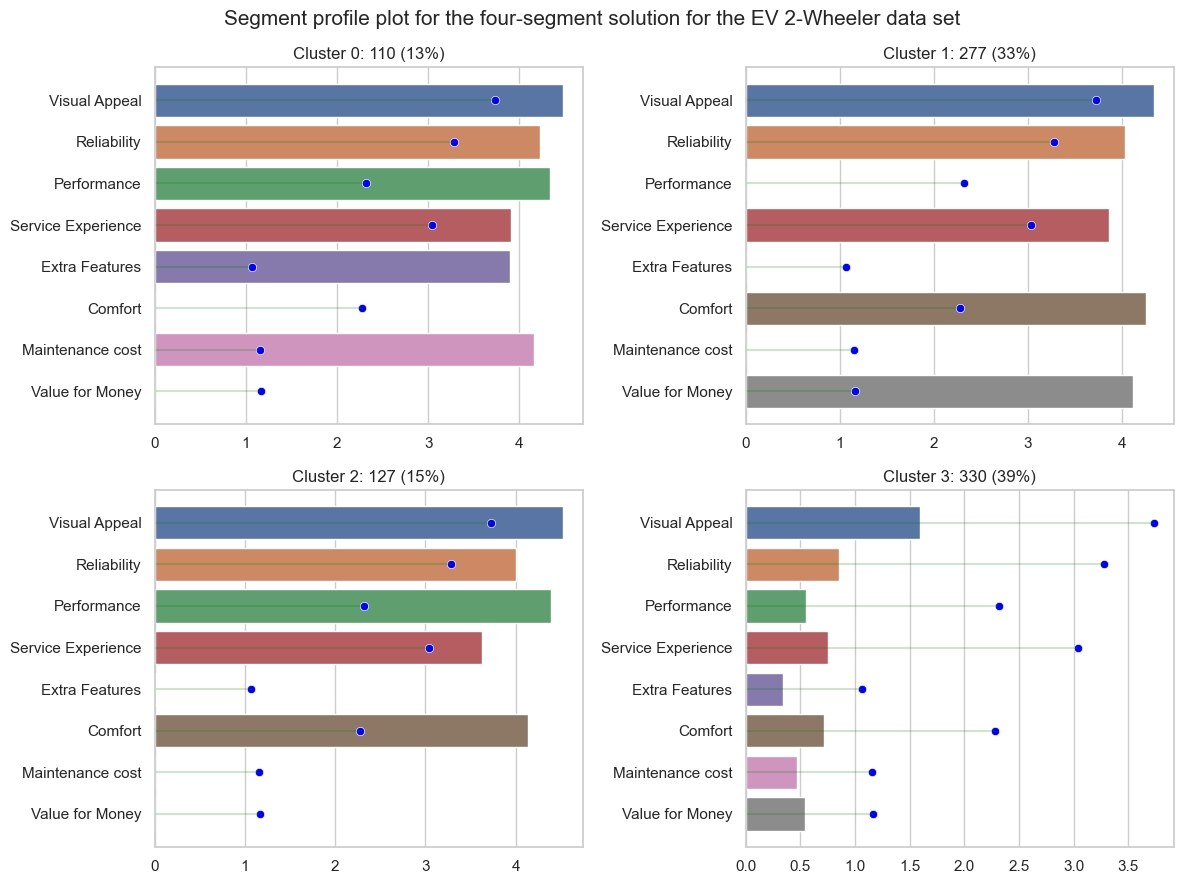

In [197]:
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'blue')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='green', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.show()

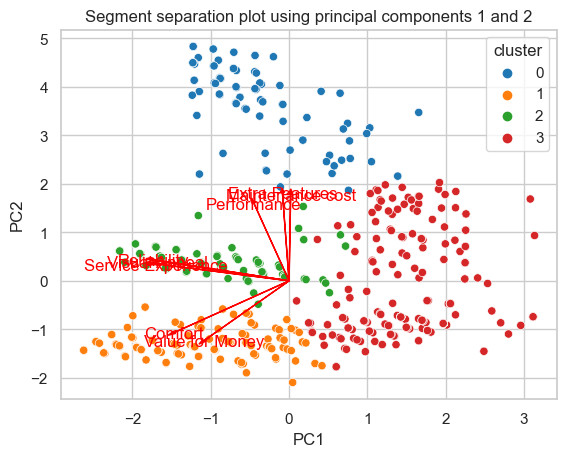

In [156]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.show()